# Introduction
This is an exercise from the Data Analysis course of Free Code Camp.
Demographic Data Analyzer
https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/demographic-data-analyzer

The idea is to answer some questions to do some practice.

Data origin: 1994 Census bureau database. 
From Kaggle: https://www.kaggle.com/datasets/uciml/adult-census-income
" A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year"

My final doc on the Camp repo:
https://replit.com/@PedroTealdi/boilerplate-demographic-data-analyzer-1#demographic_data_analyzer.py

## Questions
- How many people of each race are represented in this dataset? This should be a Pandas series with race names as the index labels. (race column)
- What is the average age of men?
- What is the percentage of people who have a Bachelor's degree?
- What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?
- What percentage of people without advanced education make more than 50K?
- What is the minimum number of hours a person works per week?
- What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?
- What country has the highest percentage of people that earn >50K and what is that percentage?
- Identify the most popular occupation for those who earn >50K in India.

# Imports

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Introductional data study

In [2]:
# Import data
df = pd.read_csv('adult.data.csv')

In [ ]:
df.head()

In [34]:
df.info()
# 32561 entries; non-null; no float; 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [33]:
df.describe()
# min age=17, mean age=35.5; fnlwgt min=12k, max=14k; both capital min=0; hores-per-week mean=40, min=1 ??, max=99 ??; 

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [32]:
# workclass values counts
print(df.workclass.value_counts())

print('\nPercentage of workclass = all goverment levels over total: {} %' .format(df.workclass.value_counts().iloc[[2,4,6]].sum() / df.shape[0] * 100))
# 9 classes; mayority class = self-emp-not-inc, minority class = never-worked, ? = 1936

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

Percentage of workclass = all goverment levels over total: 13.362611713399467 %


In [9]:
# education values counts
print(df.education.value_counts())

print('\nPercentage of education level = >high school levels over total: {} %' .format(df.education.value_counts().iloc[[0,1,2,3,4,6,9,12]].sum() / df.shape[0] * 100))

# 16 classes; majority class = HS-grad, minority class = preschool

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

Percentage of education level = >high school levels over total: 86.93836184392372 %


In [20]:
# marital values counts
print(df['marital-status'].value_counts())
# 7 classes; majority class = married-civ-spouse (46%), minority class = married-AF-spouse

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64


In [26]:
# occupation values counts
print(df.occupation.value_counts())
# 15 classes; majority class = Prof-speciality (13%), minority class = armed-forces, ? = 1843 (5%)

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


In [30]:
# relationship values counts
print(df.relationship.value_counts())
# 6 classes; majority class = husband (40%), minority class = other-relative

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


In [33]:
# race values counts
print(df.race.value_counts())
# 5 classes; majority class = white (85%), minority class = other

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64


In [36]:
# sex values count
print(df.sex.value_counts())
# male (70%), female (30%)

Male      21790
Female    10771
Name: sex, dtype: int64


In [12]:
# hours-per-week value counts
df['hours-per-week'].value_counts().tail()
# 94 different classes, seems to be rare values like 94 hours-per-week = 13 hours-per-day (7days)

82    1
92    1
87    1
74    1
94    1
Name: hours-per-week, dtype: int64

In [78]:
# native-country values counts
print(df['native-country'].value_counts())
# 3065 classes; majority class = United-States (90%), minority class = holand-Netherlands = 1, ? = 583 = 2%

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

1.7904855501980899

In [81]:
# salary values counts
print(df.salary.value_counts())
# <=50K =76%, >50K =24%

<=50K    24720
>50K      7841
Name: salary, dtype: int64


In [27]:
# Encode label (to int) features manually to study the data

# Create dictionaries
int_to_workclass = df.workclass.unique()
workclass_to_int = {workclass: i for i, workclass in enumerate(int_to_workclass)}

int_to_marital = df['marital-status'].unique()
marital_to_int = {marital: i for i, marital in enumerate(int_to_marital)}

int_to_occupation = df.occupation.unique()
occupation_to_int = {occupation: i for i, occupation in enumerate(int_to_occupation)}

int_to_relationship = df.relationship.unique()
relationship_to_int = {relationship: i for i, relationship in enumerate(int_to_relationship)}

int_to_race = df.race.unique()
race_to_int = {race: i for i, race in enumerate(int_to_race)}

int_to_sex = df.sex.unique()
sex_to_int = {sex: i for i, sex in enumerate(int_to_sex)}

int_to_native_country = df['native-country'].unique()
native_country_to_int = {native_country: i for i, native_country in enumerate(int_to_native_country)}

int_to_salary = df.salary.unique()
salary_to_int = {salary: i for i, salary in enumerate(int_to_salary)}

features_label = df.dtypes[df.dtypes == 'object'].drop('education').index # label features

# Mapping label features to int
df['workclass_encode'] = df['workclass'].map(workclass_to_int)
df['marital_encode'] = df['marital-status'].map(marital_to_int)
df['occupation_encode'] = df['occupation'].map(occupation_to_int)
df['relationship_encode'] = df['relationship'].map(relationship_to_int)
df['race_encode'] = df['race'].map(race_to_int)
df['sex_encode'] = df['sex'].map(sex_to_int)
df['native_country_encode'] = df['native-country'].map(native_country_to_int)
df['salary_encode'] = df['salary'].map(salary_to_int)

# Create encode df
df_encode = df[['age', 'workclass_encode', 'fnlwgt', 'education', 'education-num',
       'marital_encode', 'occupation_encode', 'relationship_encode', 'race_encode', 'sex_encode',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native_country_encode',
       'salary_encode']].copy()

# Original df
df = df[df.columns[:15]].copy()


                            age  workclass_encode    fnlwgt  education-num  \
age                    1.000000          0.082380 -0.076646       0.036527   
workclass_encode       0.082380          1.000000 -0.006314       0.011343   
fnlwgt                -0.076646         -0.006314  1.000000      -0.043195   
education-num          0.036527          0.011343 -0.043195       1.000000   
marital_encode         0.424606          0.035949 -0.023527      -0.065996   
occupation_encode      0.017201          0.217072  0.007892      -0.242997   
relationship_encode   -0.217767          0.015524  0.017142      -0.141075   
race_encode           -0.040000          0.009359  0.000500      -0.039760   
sex_encode            -0.088832          0.019347 -0.026858      -0.012280   
capital-gain           0.077674          0.041172  0.000432       0.122630   
capital-loss           0.057775          0.012510 -0.010252       0.079923   
hours-per-week         0.068756         -0.028084 -0.018768     

Text(0.5, 1.0, 'Pearson correlation Matrix')

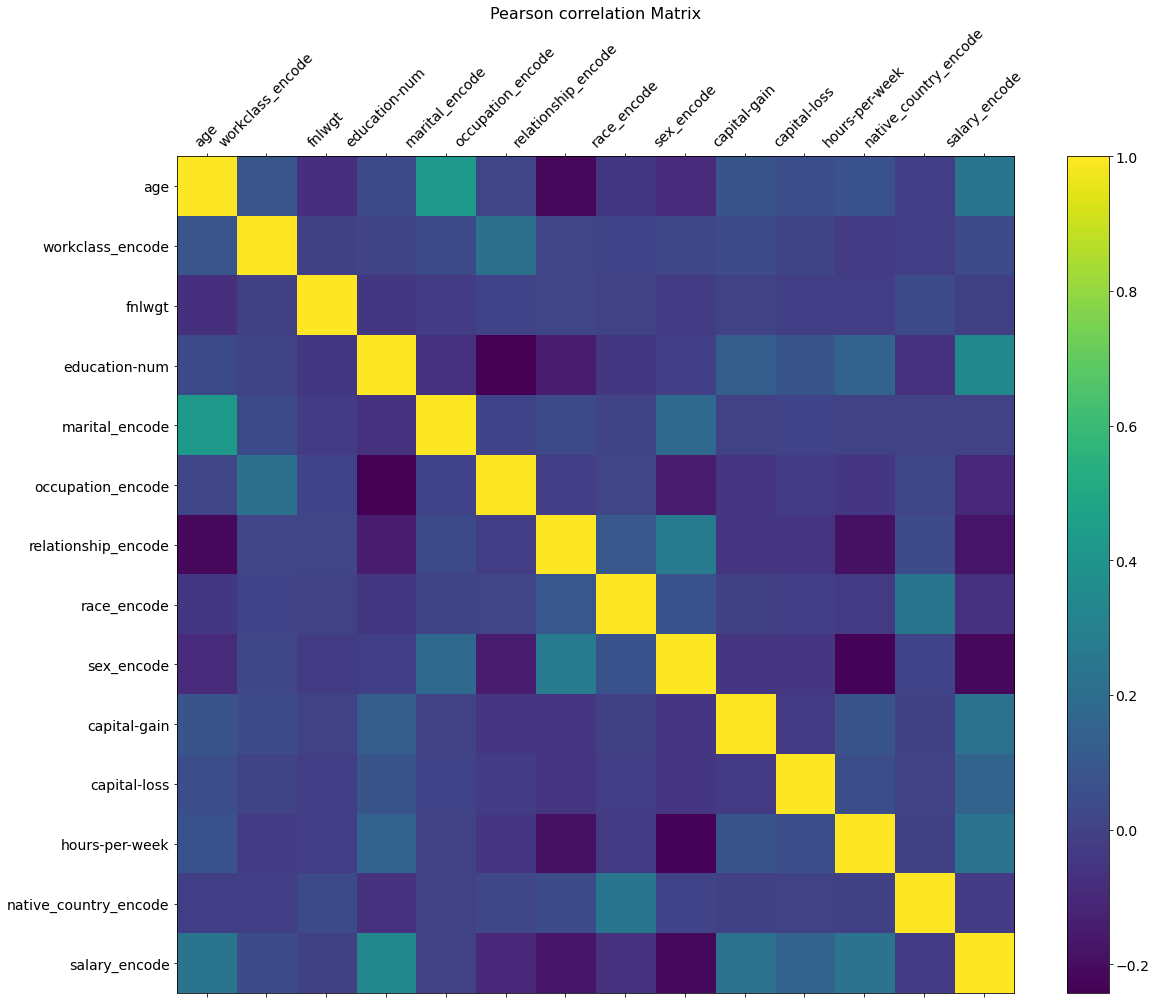

In [33]:
# Pearson correlation
corr_pearson = df_encode.corr(method='pearson')

# Pearson corr plot
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_pearson, fignum=f.number)
plt.xticks(range(df_encode.select_dtypes(['number']).shape[1]), df_encode.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_encode.select_dtypes(['number']).shape[1]), df_encode.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Pearson correlation Matrix', fontsize=16)

Text(0.5, 1.0, 'Spearmman correlation Matrix')

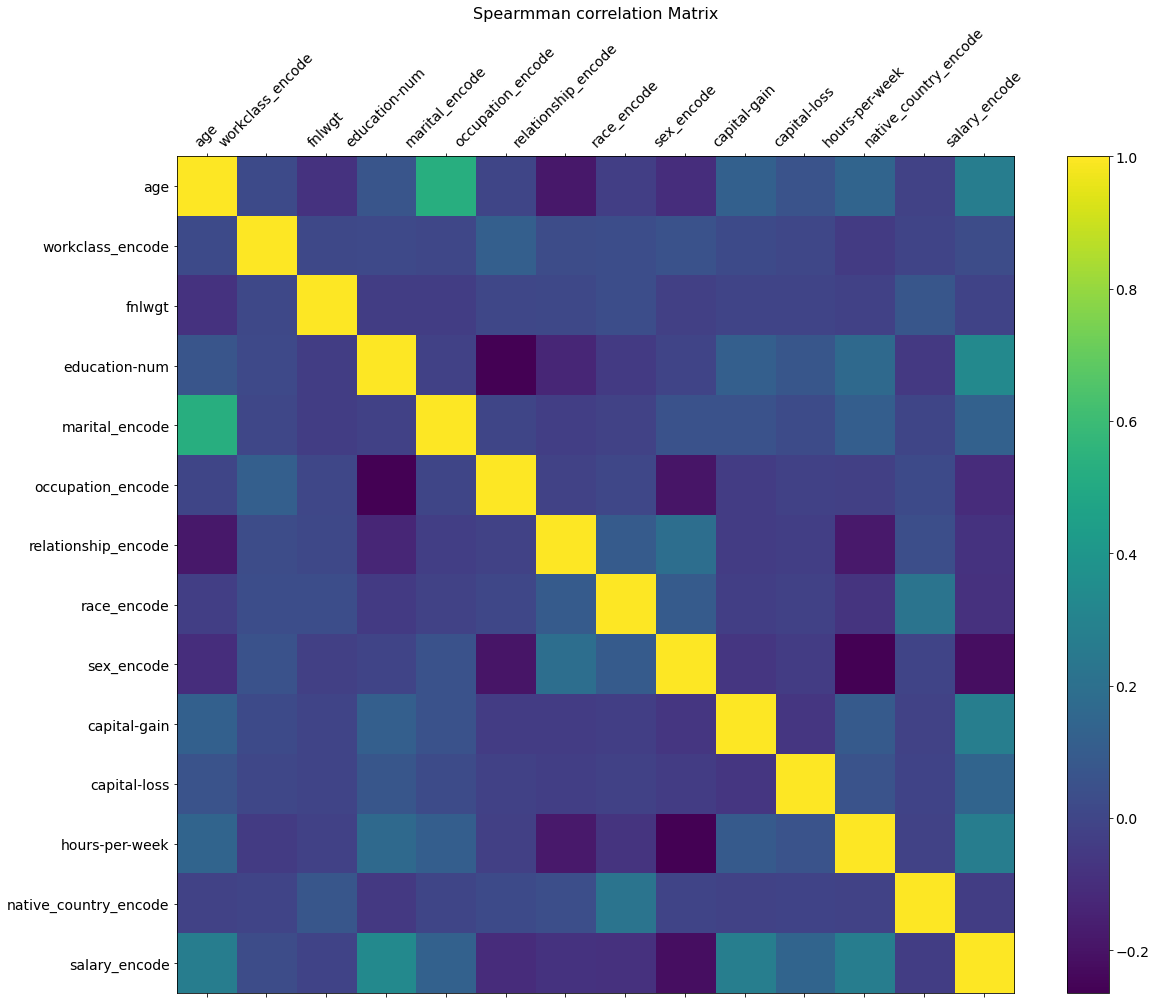

In [34]:
# Spearman correlation (no necessary Gauss distribution neither lineal)
corr_spearman = df_encode.corr(method='spearman')

# Spearman corr plot
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_spearman, fignum=f.number)
plt.xticks(range(df_encode.select_dtypes(['number']).shape[1]), df_encode.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_encode.select_dtypes(['number']).shape[1]), df_encode.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Spearmman correlation Matrix', fontsize=16)

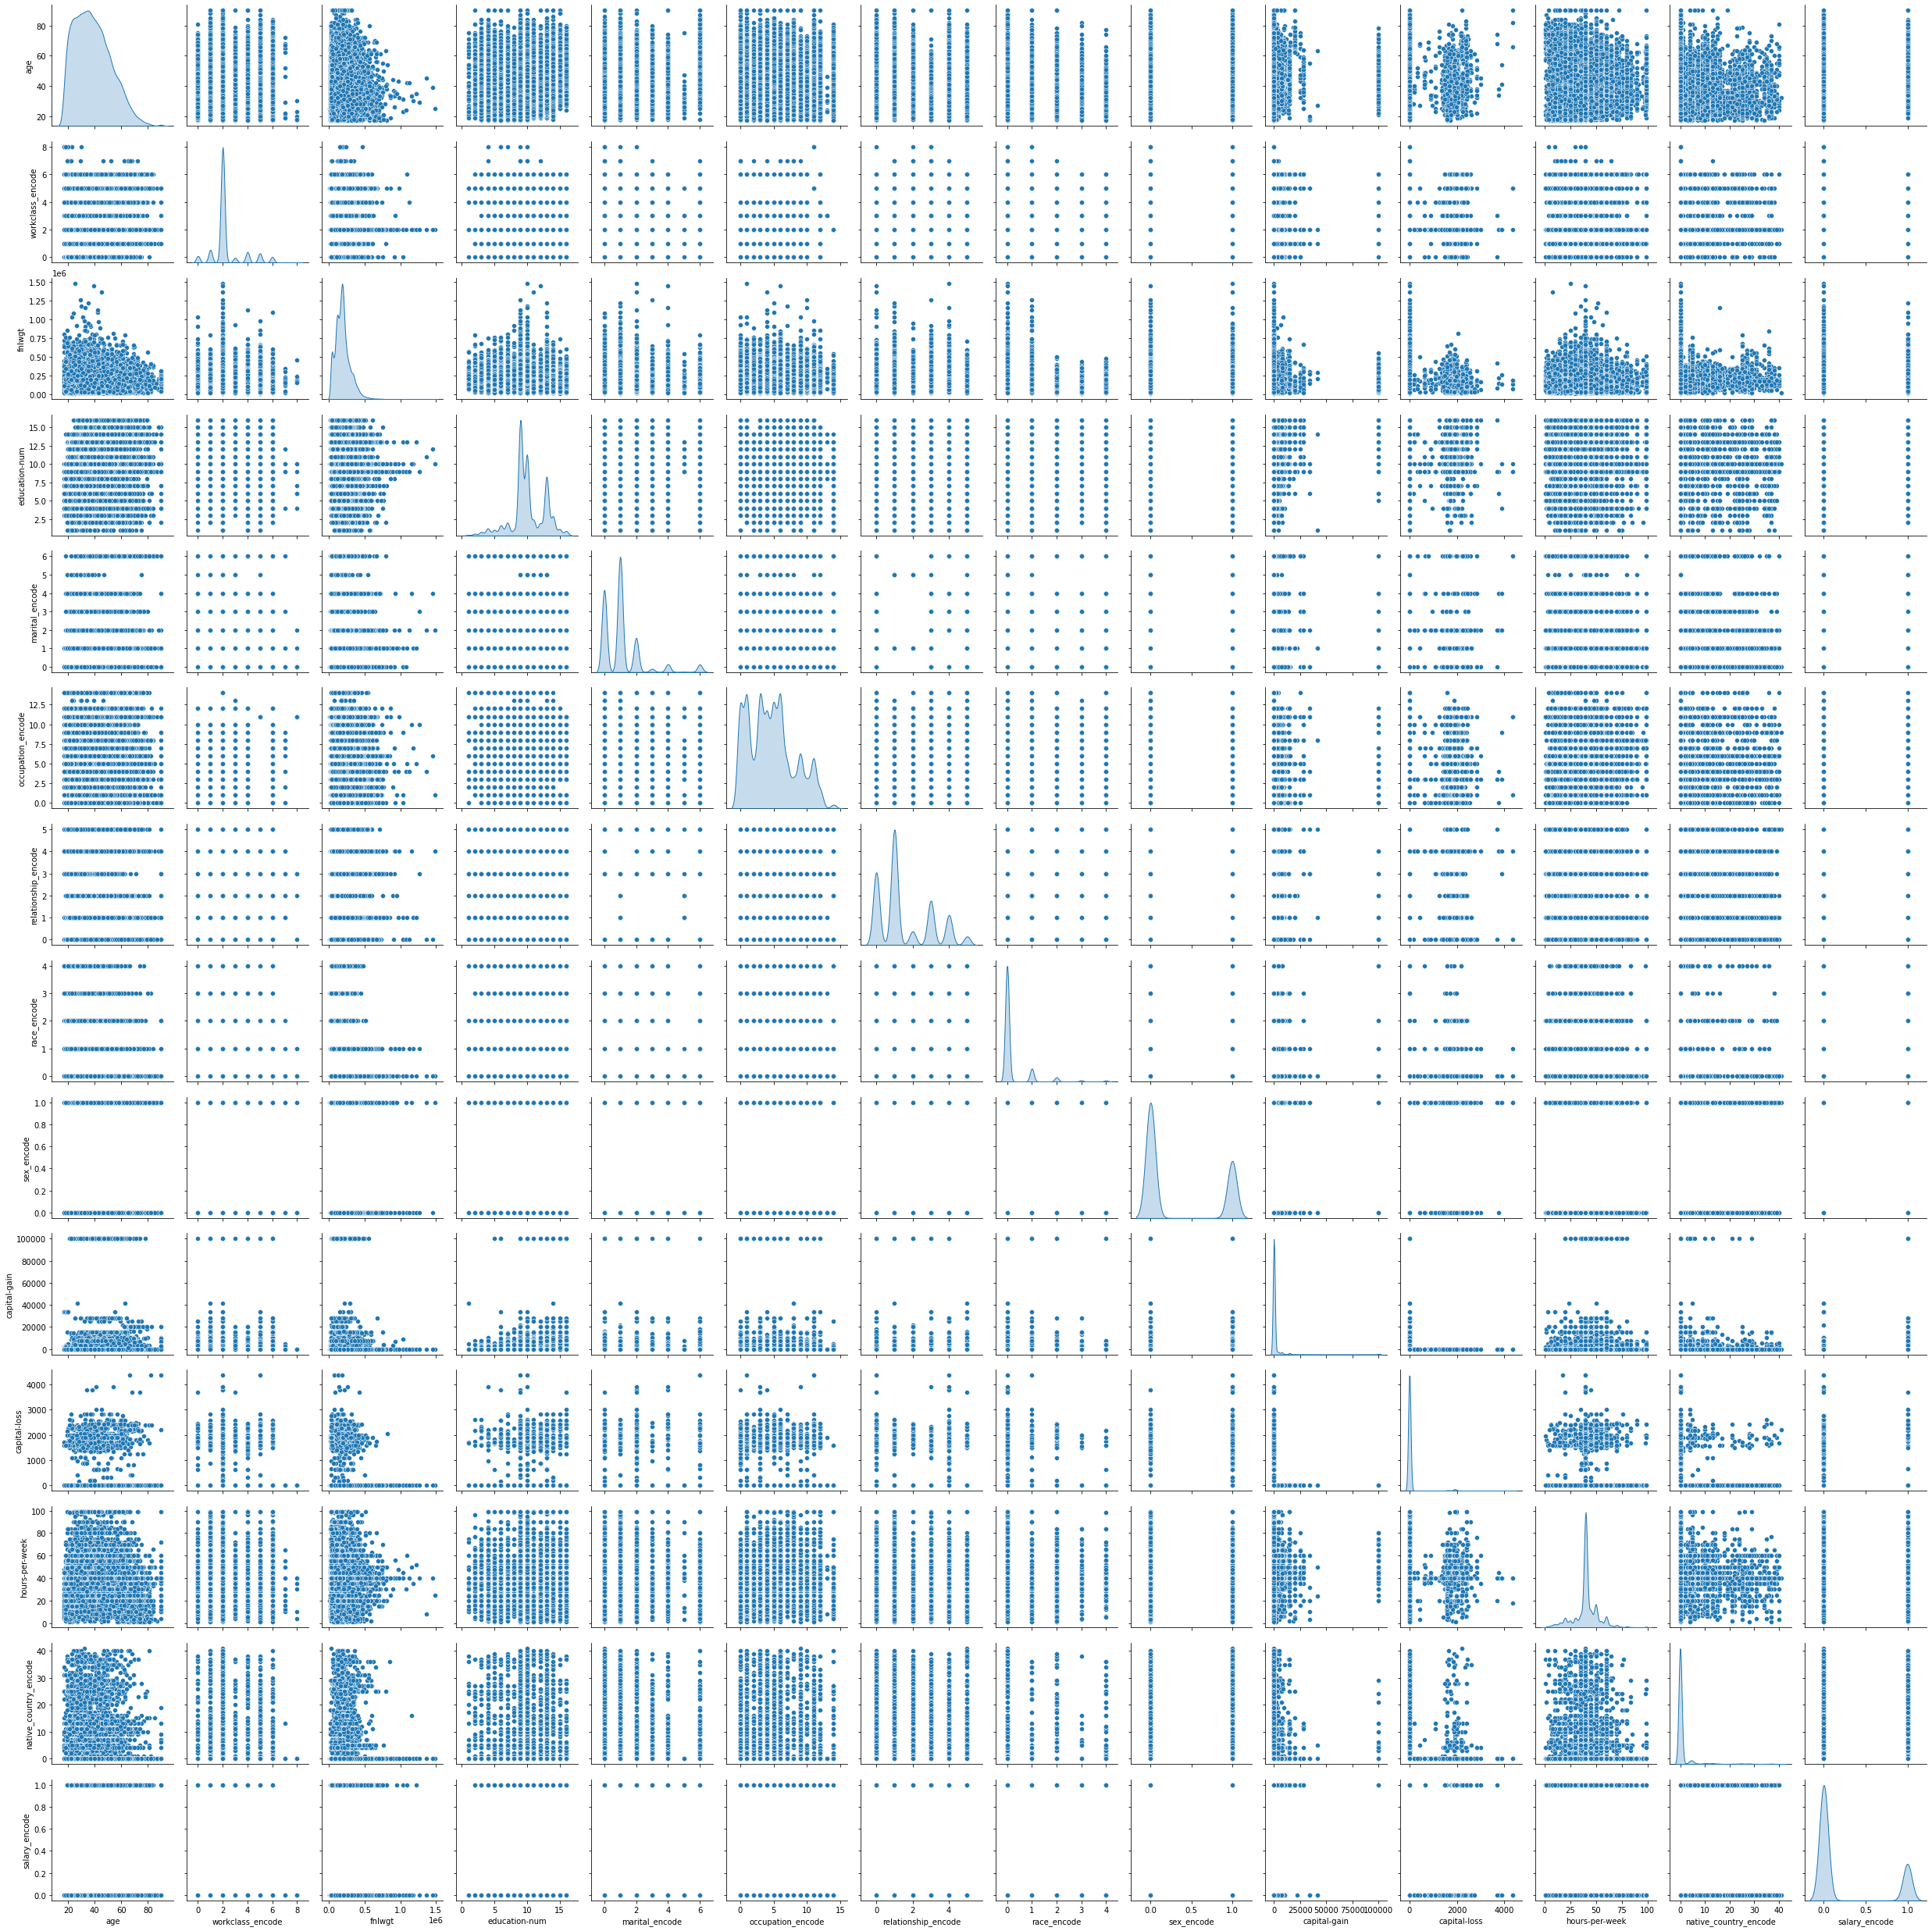

In [36]:
# Distribution plot var_i vs var_j
sns.pairplot(df_encode, diag_kind="kde")

<AxesSubplot:>

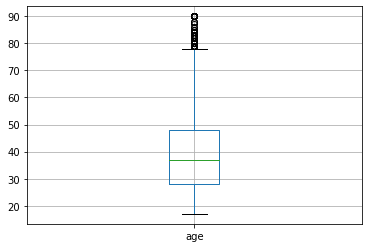

In [39]:
# Boxplot age
df.boxplot(column='age')

<BarContainer object of 2 artists>

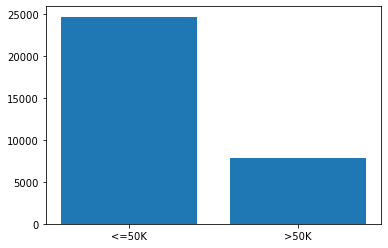

In [57]:
# Plot salary count
df.salary.value_counts().plot(kind='bar')

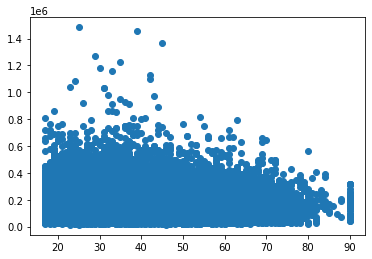

In [69]:
# Plot fnlwgt vs age
plt.plot(df.age, df.fnlwgt, 'o')

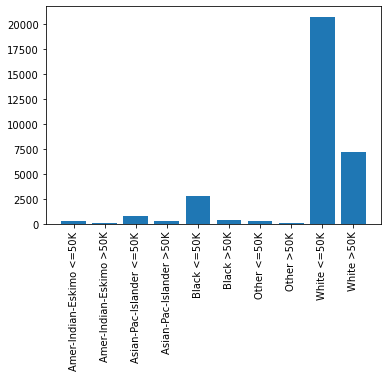

In [113]:
# Plot count of items by salary and race

x = [('Amer-Indian-Eskimo <=50K'),
 ('Amer-Indian-Eskimo >50K'),
 ('Asian-Pac-Islander <=50K'),
 ('Asian-Pac-Islander >50K'),
 ('Black <=50K'),
 ('Black >50K'),
 ('Other <=50K'),
 ('Other >50K'),
 ('White <=50K'),
 ('White >50K')]

plt.bar(x=x, height=df.groupby(['race', 'salary']).salary.count().values)
_ = plt.xticks(rotation=90)

# Answers

In [4]:
# How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.
race_count = df.race.value_counts()
race_count

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [169]:
# What is the average age of men?
average_age_men = round(df[df['sex'] == 'Male'].age.mean(), 1)
average_age_men

39.4

In [26]:
# What is the percentage of people who have a Bachelor's degree?
percentage_bachelors = df[df['education'] == 'Bachelors'].education.count() / df.shape[0] * 100
percentage_bachelors

16.44605509658794

In [41]:
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
df.loc[df['education'].isin(['Bachelors', 'Masters', 'Doctorate']), 'salary'].value_counts()[1] / df.loc[df['education'].isin(['Bachelors', 'Masters', 'Doctorate']), 'salary'].count() * 100

46.535843011613935

In [50]:
# What percentage of people without advanced education make more than 50K?
df.loc[~df['education'].isin(['Bachelors', 'Masters', 'Doctorate']), 'salary'].value_counts()[1] / df.loc[~df['education'].isin(['Bachelors', 'Masters', 'Doctorate']), 'salary'].count() * 100

17.3713601914639

In [59]:
# with and without `Bachelors`, `Masters`, or `Doctorate`
higher_education = df.loc[df['education'].isin(['Bachelors', 'Masters', 'Doctorate']), 'education'].count()
lower_education = df.loc[~df['education'].isin(['Bachelors', 'Masters', 'Doctorate']), 'education'].count()
print('higher_education:', higher_education, '| lower_education:', lower_education)

higher_education: 7491 | lower_education: 25070


In [64]:
# percentage with salary >50K
higher_education_rich = df.loc[df['education'].isin(['Bachelors', 'Masters', 'Doctorate']), 'salary'].value_counts()[1] / df.loc[df['education'].isin(['Bachelors', 'Masters', 'Doctorate']), 'salary'].count() * 100   
lower_education_rich = df.loc[~df['education'].isin(['Bachelors', 'Masters', 'Doctorate']), 'salary'].value_counts()[1] / df.loc[~df['education'].isin(['Bachelors', 'Masters', 'Doctorate']), 'salary'].count() * 100
print('higher_education_rich', higher_education_rich, '| lower_education_rich', lower_education_rich)

higher_education_rich 46.535843011613935 | lower_education_rich 17.3713601914639


In [66]:
# What is the minimum number of hours a person works per week (hours-per-week feature)?
min_work_hours = df['hours-per-week'].min()
min_work_hours

1

In [80]:
# What percentage of the people who work the minimum number of hours per week have a salary of >50K?
num_min_workers = df[df['hours-per-week'] == df['hours-per-week'].min()]['hours-per-week'].count()
rich_percentage = df[df['hours-per-week'] == df['hours-per-week'].min()].salary.value_counts()[1] / num_min_workers * 100
print('num_min_workers:', num_min_workers, '| rich_percentage:', rich_percentage)

num_min_workers: 20 | rich_percentage: 10.0


In [142]:
# What country has the highest percentage of people that earn >50K?
count_per_country_and_salary = df.groupby(['native-country','salary']).agg({'salary':'count'}).rename(columns={'native-country':'native-country', 'salary':'salary', 'salary':'salary_count'}).reset_index()
count_per_country_and_salary = count_per_country_and_salary[count_per_country_and_salary['native-country'] != '?'] # drop country=?
count_per_country_and_salaryMoreThan50K = count_per_country_and_salary[count_per_country_and_salary['salary'] == '>50K'].reset_index().drop(columns='index')
count_per_country_in_salaryMoreThan50K = df[df['native-country'] != '?']['native-country'].value_counts()[count_per_country_and_salaryMoreThan50K['native-country']]
count_per_country_and_count_salaryMoreThan50K = count_per_country_and_salaryMoreThan50K.join(count_per_country_in_salaryMoreThan50K, on='native-country', rsuffix='total_per_country')
count_per_country_and_count_salaryMoreThan50K['percentage'] = 100 * count_per_country_and_count_salaryMoreThan50K['salary_count'] / count_per_country_and_count_salaryMoreThan50K['native-countrytotal_per_country']

highest_earning_country = count_per_country_and_count_salaryMoreThan50K.loc[count_per_country_and_count_salaryMoreThan50K['percentage'] == count_per_country_and_count_salaryMoreThan50K['percentage'].max()]['native-country'].tolist()[0]
highest_earning_country_percentage = count_per_country_and_count_salaryMoreThan50K.loc[count_per_country_and_count_salaryMoreThan50K['percentage'] == count_per_country_and_count_salaryMoreThan50K['percentage'].max()]['percentage'].tolist()[0]
print('highest_earning_country: ', highest_earning_country, '| highest_earning_country_percentage: ', highest_earning_country_percentage)

highest_earning_country:  Iran | highest_earning_country_percentage:  41.86046511627907


In [175]:
# Identify the most popular occupation for those who earn >50K in India.
top_IN_occupation = df.loc[(df['native-country'] == 'India') & (df['salary'] == '>50K')].occupation.value_counts(sort=True).reset_index()['index'][0]
# print('top_IN_occupation: ', top_IN_occupation)
top_IN_occupation

'Prof-specialty'

# Bibliography
- https://rpubs.com/Net/IncomeLevelClassification